<h1> Probability Density Functions: Exercise </h1>

<h3> Introduction </h3>

<p>
In the tutorial we introduced the concept of the probability density function by examining the Gaussian or normal distribution. Probability density functions are not limited to the normal distribution and throughout this series we will be using a variety of different PDF's and when they should be applied to model certain sets of data. In this exercise we will introduce the Benford PDF by looking at country populations. More information on the Benford PDF can be found at https://www.youtube.com/watch?v=XXjlR2OK1kM. </p>

<p> Goals </p>
<ul>
<li> Learn common pandas practices and functions </li>
<li> Be able to upload and organize data with pandas </li>
<li> Transform a dictionary into a pandas dataframe object </li>
<li> Calculate summary statistics using pandas </li>
<li> Generate a discrete probability mass function (PMF) from data </li>
</ul>

<h3> Dealing with the Data </h3>

<p> We first begin by loading numpy, matplotlib, and pandas. Remember, these packages are what allow us to perform mathematical operations, plot, and manage data. To do this we use the import function. </p>

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<p> Using the pandas function read_csv, we can load in the data from the CountryPopulation file. To print the first 5 rows of the data we can use the .head() method of the dataframe object.</p>

In [231]:
data = pd.read_csv('CountryPopulation.csv')

print(data.head())

          country    population
0     Afghanistan  2.185145e+07
1         Albania  3.143047e+06
2         Algeria  3.030252e+07
3  American Samoa  6.762183e+04
4         Andorra  8.195528e+04


<p> Right now the data is stored as a pandas dataframe object. To check the class or type of object that is stored as a variable we can use the python type() function </p>

In [239]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


<p> Once the data is stored in a pandas dataframe, it is remarkably easy to generate summary statistics (such as confidence intervals, mean, and standard deviation. These statstics are generated using the .describe method, which is associated with all dataframes. </p>

In [232]:
print(data.describe())

         population
count  2.310000e+02
mean   2.621784e+07
std    1.098057e+08
min    7.770609e+00
25%    2.975826e+05
50%    4.409269e+06
75%    1.590857e+07
max    1.253671e+09


<p> Pandas dataframe objects are handled similar to dictionaries, as opposed to standard lists or numpy arrays. Before continuing we should note that our data is already organized with nice headers and no missing values and thus we do not need to do any cleaning. Let us recognize that the headers of our dataframe are country and population. We can access all the rows of a given column by calling the header name in brackets. If we wanted to grab a specific element or elements we then would follow with a second set of brackets that adheres to standard python indexing. For example if we wanted to grab the first 5 countries we would write: </p>

In [235]:
print(data['country'][:5])

0       Afghanistan
1           Albania
2           Algeria
3    American Samoa
4           Andorra
Name: country, dtype: object


<p> Often times we want to find the minimum or maximum value and the key associated with that value. In this case say we wanted to determine which countries have the smallest and largest populations respectively. We can determine this by first finding the indices of the extrema in the populations column and then calling those indices from the country column. Finding the minimum or maximum index is accomplished by us of the .idxmin and .idxmax methods. For example: </p>

In [238]:
#Determine and call country with min population
min_idx = data['population'].idxmin()
print(min_idx)
print(data['country'][min_idx])


#Call country with max population
print(data['country'][data['population'].idxmax()])

197
Svalbard
China


<h3> Leading Digit of Population </h3> 

<p> There are several ways of calculating the leading digit of a number but in an effort to build our computational skills we will employ a method involves using some computer science thinking. This is done by converting the populations to a string and calling the first index of the string. </p> 


Right now each population is stored as a floating point number in our dataframe. For example:

In [240]:
print(type(data['population'][0]))

<class 'numpy.float64'>


<p> We can convert this value to a string using the str function </p>

In [241]:
print(type(str(data['population'][0])))
print(str(data['population'][0]))

<class 'str'>
21851445.2


Now that this given entry is a string we can access each digit by indexing and then convert it back to a number using the int() function. We want the first digit thus

In [242]:
print(int(str(data['population'][0])[0]))

2


<p> Now that we have the methodology to access the leading digit of a single entry, we can apply this for each country by using a for loop. We will loop through each country's population, determine the leading digit, and then store that value in a list defined as ld. </p>

In [243]:
ld = np.array([int(str(pop)[0]) for pop in data['population']])

<p> Now that we have the leading digits determined we want to determine the frequency of digit. To do this we are going to create a dictionary with keys corresponding the leading digit value and values according to the frequency. It is important to remember that the keys of a dictionary must be strings. In order to set up our dictionary, we will first start with an empty dictionary. We will then loop through each item in the leading digit array. Within our loop we have to consider two conditions: 1) It is the first time we see the digit and therefore set the count to 1 or 2) The digit has already appeared once and we want to add 1 to the frequency associated with that key. This can be accomplised by setting an if-else statement in the loop. We can call and assign values to dictionaries similar to lists by putting the key in brackets. If it is the first time seeing the key we will set the value associated with that key to 1. Otherwise we will add one to the value using the += operator. <p>

In [254]:
freq_ld = {}

for d in ld:
    
    if str(d) not in freq_ld:
        
        freq_ld[str(d)] = 1
        
    else:
        
        freq_ld[str(d)] += 1

print(freq_ld)

{'2': 39, '3': 32, '6': 19, '8': 14, '1': 66, '7': 16, '4': 21, '5': 17, '9': 7}


<p> Now we have our transformed data stored in a dictionary, which isn't all that helpful because we can't easily manipulate or perform mathematical functions on dictionary items. To fix this, and to further practice with pandas, we will transform our frequency dictionary into a dataframe object, with headers being Leading Digit and Frequency. </p>

<p>To do this we first want to convert all the items in our dictionary into a list. To access the items in a dictionary we can use the .items method. If we print this we see we get another object, where the keys and the values are grouped together as tuples. We can then turn these dictionary items into a list using the list() function.</p>

In [258]:
print(freq_ld.items())
print(list(freq_ld.items()))

dict_items([('2', 39), ('3', 32), ('6', 19), ('8', 14), ('1', 66), ('7', 16), ('4', 21), ('5', 17), ('9', 7)])
[('2', 39), ('3', 32), ('6', 19), ('8', 14), ('1', 66), ('7', 16), ('4', 21), ('5', 17), ('9', 7)]


<p> We now have a way of grouping our data into rows and columns. We can now convert the dictionary to a pandas dataframe using the DataFrame function, which will take in a list of our dictionary items followed by a the header titles specificed as a list using the kwarg columns. </p>

In [259]:
freq_ld = pd.DataFrame(list(freq_ld.items()), columns=['Leading Digit','Frequency'])

<h2> Calculating Discrete Probabilities </h2>
<p> Now we want to calculate the probability (frequency) of observing each digit. Recall that the probability of observing an instance is the number of times that instance is observed divided by the total number of observations. 
$$
P = \frac{N_{desired}}{N_{total}}
$$

Because we are given a fixed number of data points, i.e the discrete case, our PDF should technically be referred to as a probability mass function (PMF). Our goal is to plot this PMF. To do this we first must determine the probability of each digit occuring. This is done by applying the formula above.

In [261]:
ntotal = len(data['country'])
p_digit =  freq_ld['Frequency']/ntotal
print(p_digit)

0    0.168831
1    0.138528
2    0.082251
3    0.060606
4    0.285714
5    0.069264
6    0.090909
7    0.073593
8    0.030303
Name: Frequency, dtype: float64


<p> Now that we have the corresponding probabilities for each observation we can plot the PMF, where the $x$-axis will be the observation (digit) and the $y$-axis will be the corresponding likelihood (probability). </p>

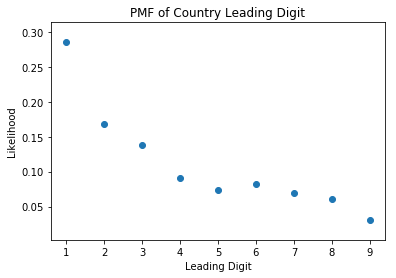

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(freq_ld['Leading Digit'], freq_ld['Frequency']/len(data['country']))
ax.set_xlabel('Leading Digit')
ax.set_ylabel('Likelihood')
ax.set_title('PMF of Country Leading Digit')
plt.show()


<h2> Agreement with the Benford PMF </h2>

<p> The Benford PMF is given by $$P_{BL}=\log_{10}(1+\frac{1}{n})$$ our goal is now to see how well our data fit to the Benford PMF (in a qualitative sense). To do this let's first generate an array of dummy leading digits, using the numpy.arange() function. We will then operate the Benford function on these values to generate a model of the Benford PMF for leading digits. We will then compare the model to the observed data by plotting the two on the same graph. </p>

In [266]:
digit_dummy = np.arange(1, 10, 1)
print(digit_dummy)
benford_model = np.log10(1+1/digit_dummy)

[1 2 3 4 5 6 7 8 9]


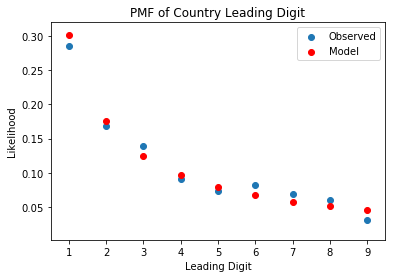

In [267]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(freq_ld['Leading Digit'], freq_ld['Frequency']/len(data['country']), label = 'Observed')
ax.scatter(digit_dummy, benford_model, color = 'red', label = 'Model')
ax.legend(loc = 0)
ax.set_xlabel('Leading Digit')
ax.set_ylabel('Likelihood')
ax.set_title('PMF of Country Leading Digit')
plt.show()

<p> The distribution of leading digits in the table of country population follows Benford’s Law to a remarkable degree. </p>